### Retinex model based stain normalization technique for whole slide image analysis 논문 기반

In [1]:
import os
import yaml
from pathlib import Path
from PIL import Image
from scipy import linalg
from scipy.ndimage import gaussian_filter

import numpy as np
import skimage
import matplotlib.pyplot as plt
from openslide import OpenSlide

from src.utils import *
from src.wsi_reader import WSIReader

In [2]:
config = load_config()
config

{'dataset_path': '/Users/cmkim/workspace/datasets/TIGER/'}

In [3]:
rgb = WSIReader(
    path=Path(config["dataset_path"]) / "wsibulk/images" / "119S.tif"
).read_array(
    level=32
)

In [4]:
transmission = skimage.util.img_as_float(rgb, force_copy=True)
np.maximum(transmission, 1e-6, out=transmission)

array([[[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       ...,

       [[0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0

In [5]:
od = np.log(transmission) / np.log(1e-6)
od

array([[[0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        ...,
        [0.00684203, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412]],

       [[0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        ...,
        [0.00684203, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412]],

       [[0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        ...,
        [0.00684203, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412]],

       ...,

       [[0.00622072, 0.00746872, 0.0071547 ],
        [0.00622072, 0.00746872, 0.0071547 ],
        [0.00622072, 0

In [7]:
stain_matrix = StainSpecficVector.hed()
stains = od @ linalg.inv(stain_matrix)

### illumination map

In [8]:
tmap = np.max(stains, axis=2)
tmap

array([[0.00798515, 0.00798515, 0.00798515, ..., 0.00763391, 0.00881215,
        0.00881215],
       [0.00798515, 0.00798515, 0.00798515, ..., 0.00763391, 0.00881215,
        0.00881215],
       [0.00798515, 0.00798515, 0.00798515, ..., 0.00763391, 0.00881215,
        0.00881215],
       ...,
       [0.00688698, 0.00688698, 0.00688698, ..., 0.00763391, 0.00881215,
        0.00881215],
       [0.00919314, 0.00919314, 0.00919314, ..., 0.00876638, 0.00996012,
        0.00996012],
       [0.0084328 , 0.0084328 , 0.0084328 , ..., 0.00763391, 0.00881215,
        0.00881215]], shape=(1356, 1736))

In [9]:
tmap_gradh = np.abs(np.gradient(tmap, axis=1))
tmap_gradv = np.abs(np.gradient(tmap, axis=0))

In [10]:
tmap_gradh, tmap_gradv

(array([[0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00059687, 0.00059687,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ]], shape=(1356, 1736)),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.00059168, 0.00059168, 0.00059168, ..., 0.00018956, 0.00019216,
         0.000

In [11]:
epsilon=1e-4
sigma=6

In [12]:
gaussian = gaussian_filter(tmap, sigma=sigma)
gaussian

array([[0.00799476, 0.00799624, 0.00799922, ..., 0.00791716, 0.00793277,
        0.0079409 ],
       [0.00799396, 0.00799541, 0.00799834, ..., 0.00791716, 0.00793277,
        0.0079409 ],
       [0.0079923 , 0.0079937 , 0.00799653, ..., 0.00791716, 0.00793277,
        0.0079409 ],
       ...,
       [0.00799526, 0.00799331, 0.00798948, ..., 0.00819299, 0.00820217,
        0.00820703],
       [0.00800671, 0.00800481, 0.00800106, ..., 0.00820652, 0.0082153 ,
        0.00821995],
       [0.0080126 , 0.00801072, 0.00800703, ..., 0.00821355, 0.00822213,
        0.00822667]], shape=(1356, 1736))

In [13]:
wh = np.sum(gaussian / (gaussian * tmap_gradh + epsilon), axis=1, keepdims=True)
wv = np.sum(gaussian / (gaussian * tmap_gradv + epsilon), axis=0, keepdims=True)

In [14]:
wh

array([[178785.5715018 ],
       [172495.41310831],
       [179416.10572547],
       ...,
       [145859.82581528],
       [146156.48431947],
       [146435.22945383]], shape=(1356, 1))

In [15]:
tmap_adj = tmap / (wh + wv + epsilon)
tmap_adj

array([[2.70292895e-08, 2.70261074e-08, 2.71360587e-08, ...,
        2.63332854e-08, 3.03861469e-08, 3.03902913e-08],
       [2.76173127e-08, 2.76139907e-08, 2.77287875e-08, ...,
        2.69173374e-08, 3.10598284e-08, 3.10641586e-08],
       [2.69717232e-08, 2.69685546e-08, 2.70780371e-08, ...,
        2.62761338e-08, 3.03202242e-08, 3.03243506e-08],
       ...,
       [2.62360916e-08, 2.62326155e-08, 2.63527845e-08, ...,
        2.97073852e-08, 3.42778849e-08, 3.42831590e-08],
       [3.49819162e-08, 3.49772866e-08, 3.51373324e-08, ...,
        3.40750528e-08, 3.86986631e-08, 3.87046105e-08],
       [3.20546882e-08, 3.20504505e-08, 3.21969479e-08, ...,
        2.96410135e-08, 3.42013344e-08, 3.42065850e-08]],
      shape=(1356, 1736))

In [16]:
stains_adj = stains * tmap_adj[..., np.newaxis]
stains_adj = stains_adj + stains_adj * (1-tmap_adj[..., np.newaxis])
stains_adj

array([[[ 4.31665952e-10, -4.62125071e-11,  3.45578307e-10],
        [ 4.31615133e-10, -4.62070667e-11,  3.45537623e-10],
        [ 4.33371088e-10, -4.63950525e-11,  3.46943386e-10],
        ...,
        [ 4.02051979e-10, -8.00427920e-11,  3.90954041e-10],
        [ 5.35534306e-10, -1.31104177e-10,  4.29976451e-10],
        [ 5.35607348e-10, -1.31122058e-10,  4.30035096e-10]],

       [[ 4.41056861e-10, -4.72178619e-11,  3.53096376e-10],
        [ 4.41003807e-10, -4.72121822e-11,  3.53053902e-10],
        [ 4.42837147e-10, -4.74084526e-11,  3.54521617e-10],
        ...,
        [ 4.10969184e-10, -8.18180796e-11,  3.99625102e-10],
        [ 5.47407464e-10, -1.34010845e-10,  4.39509320e-10],
        [ 5.47483781e-10, -1.34029528e-10,  4.39570594e-10]],

       [[ 4.30746600e-10, -4.61140848e-11,  3.44842302e-10],
        [ 4.30695997e-10, -4.61086675e-11,  3.44801791e-10],
        [ 4.32444466e-10, -4.62958519e-11,  3.46201561e-10],
        ...,
        [ 4.01179400e-10, -7.98690738e-11,

In [17]:
stains

array([[[ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        ...,
        [ 0.00763391, -0.0015198 ,  0.00742319],
        [ 0.00881215, -0.0021573 ,  0.00707521],
        [ 0.00881215, -0.0021573 ,  0.00707521]],

       [[ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        ...,
        [ 0.00763391, -0.0015198 ,  0.00742319],
        [ 0.00881215, -0.0021573 ,  0.00707521],
        [ 0.00881215, -0.0021573 ,  0.00707521]],

       [[ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        ...,
        [ 0.00763391, -0.0015198 ,  0.00742319],
        [ 0.00881215, -0.0021573 ,  0.00707521],
        [ 0.00881215, -0.0021573 ,  0.00707521]],

       ...,

       [[ 0.00688698, -0.00130171,  0.00685787],
        [ 0

In [18]:
null = np.zeros_like(stains[:, :, 0])

In [19]:
hematoxylin = skimage.color.hed2rgb(np.stack((stains[:, :, 0], null, null), axis=-1))
eosin = skimage.color.hed2rgb(np.stack((null, stains[:, :, 1], null), axis=-1))
dab = skimage.color.hed2rgb(np.stack((null, null, stains[:, :, 2]), axis=-1))

In [20]:
hematoxylin_adj = skimage.color.hed2rgb(np.stack((stains_adj[:, :, 0], null, null), axis=-1))
eosin_adj = skimage.color.hed2rgb(np.stack((null, stains_adj[:, :, 1], null), axis=-1))
dab_adj = skimage.color.hed2rgb(np.stack((null, null, stains_adj[:, :, 2]), axis=-1))

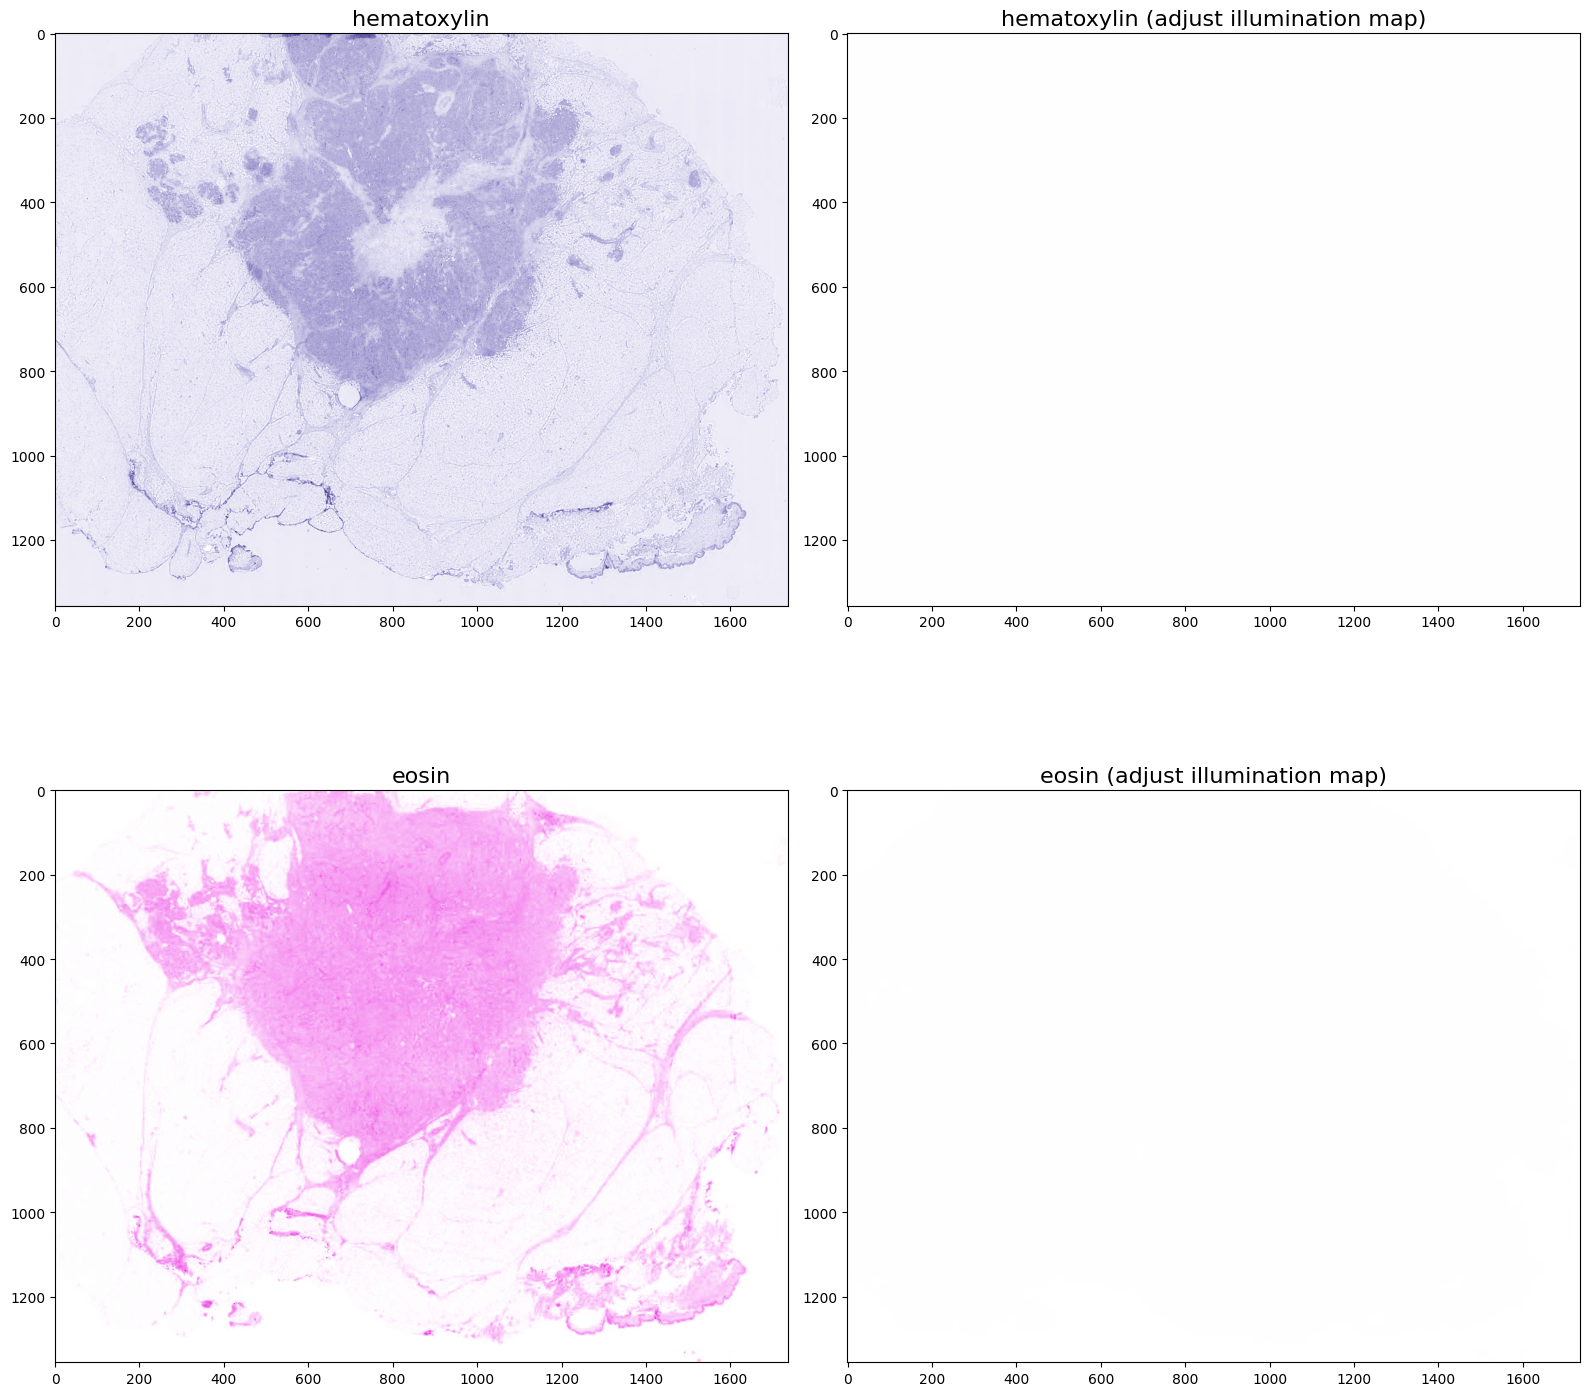

In [21]:
fontdict={
    "fontsize": 16
}

fig = plt.figure(figsize=(16, 16))

ax = fig.add_subplot(221)
ax.imshow(hematoxylin)
ax.set_title(label="hematoxylin", fontdict=fontdict)

ax = fig.add_subplot(222)
ax.imshow(hematoxylin_adj)
ax.set_title(label="hematoxylin (adjust illumination map)", fontdict=fontdict)

ax = fig.add_subplot(223)
ax.imshow(eosin)
ax.set_title(label="eosin", fontdict=fontdict)

ax = fig.add_subplot(224)
ax.imshow(eosin_adj)
ax.set_title(label="eosin (adjust illumination map)", fontdict=fontdict)

fig.tight_layout()
plt.show()